In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *
import plotly.graph_objects as go

In [2]:
class MultiLJ:
    import plotly.graph_objects as go
    def __init__(self,radius):
        self.radius = radius - (0.373/2)
        ndf = (0.373/2)* self.hcp(30)
        mydf = ndf - ndf.mean()
        rad = np.sqrt(mydf.x **2 + mydf.y**2 + mydf.z**2)
        
        df = ndf[rad < self.radius]
        self.df = df
        fig = go.Figure(data=go.Scatter3d(
            x=df.x, y=df.y, z=df.z, mode='markers',
            marker=dict(size=df.x*0 + 37, symbol="circle", color=-df.z, opacity=1),
        ))
        x , y, z = self.get_coords_sphere(self.radius,*ndf.mean())
        fig.add_trace(go.Surface(
                x=x,
                y=y,
                z=z,
                surfacecolor = z*0,
                opacity = 0.7,
                showlegend = False,
                hoverinfo = "skip",
                showscale = False))


        fig.layout.scene.camera.projection.type = 'orthographic'
        fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False, bgcolor='rgba(0,0,0,1)' )
        fig.update_layout(showlegend=False)
        fig.update_layout(height = 500,width = 500, margin=dict(l=0, r=0, b=0, t=0))
        self.fig = fig
        fig.show()
        self.make_gro(df)
        self.make_topol(df)
        self.make_itp(df)
        
        print("Successful!\n")
        print(f"Generated methane{len(df)}.gro file with {len(df)} number of methane...\n")
        print(f"Written methane{len(df)}.itp file for the itp configuration...\n")
        print(f"Generated topol{len(df)}.top for the topology of this methane cluster...\n")
        
    def get_coords_sphere(self,r,x,y,z):

        theta = linspace(0,2*pi,100)
        phi = linspace(0,pi,100)
        x = x + r* outer(cos(theta),sin(phi))
        y = y + r* outer(sin(theta),sin(phi))
        z = z + r* outer(ones(100),cos(phi))  # note this is 2d now
        return x , y, z

    def hcp(self,n):
        dim = 3
        k, j, i = [v.flatten()
                   for v in np.meshgrid(*([range(n)] * dim), indexing='ij')]
        df = pd.DataFrame({
            'x': 2 * i + (j + k) % 2,
            'y': np.sqrt(3) * (j + 1/3 * (k % 2)),
            'z': 2 * np.sqrt(6) / 3 * k,
        })
        return df
    #writing a gro file...
    def make_gro_line(self, resn, index, x,y,z):
        #global template;
        template = "    1SOL    XXindex   XXXXX   YYYYY   ZZZZZ\n"
        gro = template.replace('1SOL'.rjust(8), resn.rjust(8))
        gro = gro.replace('index', index.rjust(5))
        gro = gro.replace('XXXXX', x)
        gro = gro.replace('YYYYY', y)
        gro = gro.replace('ZZZZZ', z)
        return gro
    def make_gro(self, df):
        fo = open(f"methane{len(df)}.gro","w")
        fo.write("Methane_cluster\n")
        #df = df - df.mean()
        fo.write(str(len(df))+"\n")
        for i in range(len(df)):
            resn = str(i+1) + "XXX"
            index = str(i+1)
            x = str(('%.3f'%df.x.iloc[i]))
            y = str(('%.3f'%df.y.iloc[i]))
            z = str(('%.3f'%df.z.iloc[i]))
            line = self.make_gro_line(resn, index, x, y, z)
            fo.write(line)
        fo.write('   3.96838   3.94838   3.94838\n')
        fo.close()
        return None
    def make_itp(self, df):
        fo = open(f"methane{len(df)}.itp","w")
        fo.write("[moleculetype]\n")
        fo.write(";mol name        nrexcl\n")
        fo.write("  XXX               3\n")
        fo.write("\n")
        fo.write(" [atoms ]\n")
        fo.write(";   nr       type  resnr residue  atom   cgnr     charge  mass\n")
        template = "    1       opls_970   1     XXX       XX     1        0       16.043\n"
        for i in range(1,len(df)+1):
            line = str(i).rjust(5) + template[5:]
            fo.write(line)
        fo.close
        return None
    def make_topol(self, df):
        fo = open(f"topol{len(df)}.top","w")
        fo.write("; Topology for methane in TIP3P\n")
        fo.write("#include \"./oplsaa.ff/forcefield.itp\"\n")
        fo.write("\n")
        fo.write(f"#include \"methane{len(df)}.itp\"\n")
        fo.write("\n")
        fo.write("#ifdef POSRES\n")
        fo.write("[ position_restraints ]\n")
        fo.write("; ai  funct  fcx    fcy    fcz\n")
        template  = "   1    1    1000   1000   1000\n"
        for i in range(1, len(df)+1):
            line = str(i).rjust(4) + template[4:]
            fo.write(line)
        fo.write("#endif\n")
        fo.write("; water topology\n")
        fo.write("#include \"./oplsaa.ff/tip3p.itp\"\n")
        fo.write("\n")
        fo.write("[ system ]\n")
        fo.write("; Name\n")
        fo.write("LJ sphere in water\n")
        fo.write("\n")
        fo.write("[ molecules ]\n")
        fo.write("; Compound             #mols\n")
        fo.write("XXX                     1\n")
        #fo.write("SOL                    1860\n")
        fo.write("\n")
        fo.close()    
        return None

In [3]:
#This will create the .gro ,.itp and .top file for MultiLJ model ... 
#a = MultiLJ(2.0)

In [5]:
#len(a.df)

<html>
<img src="./Examples/newplot (2).png">
</html>

## An example....

In [7]:
dat =  np.loadtxt("./Examples/rdf.xvg",skiprows =26)

<p > HCP cluster of methane (310 molecules(unified)) and water within 5 Angstrom of it..</p>
 <img src="./Examples/VMD 1.9.3 OpenGL Display 27-12-2021 19_20_13.png">    

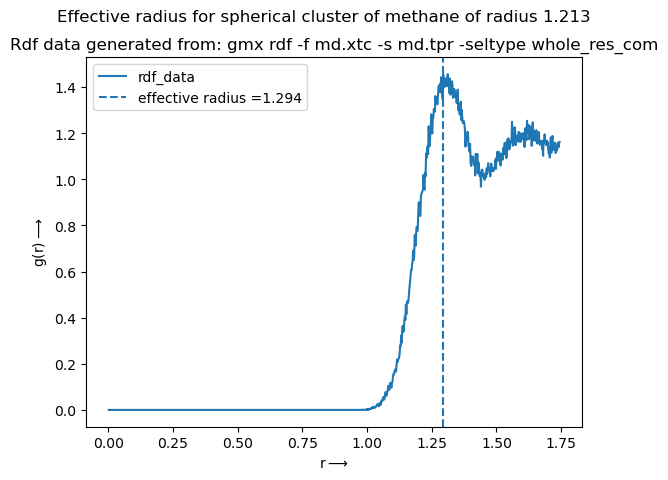

In [8]:
plt.style.use("default")

plt.plot(dat[:,0],dat[:,1],label = "rdf_data")
plt.axvline(x=dat[:,0][np.argmax(dat[:,1])], ls = "--", label = f"effective radius ={dat[:,0][np.argmax(dat[:,1])]}")
plt.legend()
plt.xlabel(r"r$\longrightarrow$")
plt.ylabel(r"g(r)$\longrightarrow$")
plt.suptitle("Effective radius for spherical cluster of methane of radius 1.213 ")
plt.title("Rdf data generated from: gmx rdf -f md.xtc -s md.tpr -seltype whole_res_com")
#plt.savefig("something.png")
plt.show()

In [9]:
1.4 - (0.373/2)

1.2134999999999998

In [10]:
0.373/2

0.1865